In [1]:
import ee
import geemap
import os

In [2]:
geemap.show_youtube('_6JOA-iiEGU')

Output(layout=Layout(width='815px'))

In [3]:
Map = geemap.Map()
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=…

In [4]:
image = ee.Image('LE7_TOA_5YEAR/1999_2003')

landsat_vis = {
    'bands': ['B4', 'B3', 'B2'], 
    'gamma': 1.4
}
Map.addLayer(image, landsat_vis, "LE7_TOA_5YEAR/1999_2003", True, 0.7)

In [6]:
# Extract pixels as a Numpy array

In [10]:
import ee
import geemap
import numpy as np
import matplotlib.pyplot as plt

img = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_038029_20180810') \
  .select(['B4', 'B5', 'B6'])

aoi = ee.Geometry.Polygon(
  [[[-110.8, 44.7],
    [-110.8, 44.6],
    [-110.6, 44.6],
    [-110.6, 44.7]]], None, False)

rgb_img = geemap.ee_to_numpy(img, region=aoi)
print(rgb_img.shape)

(373, 531, 3)


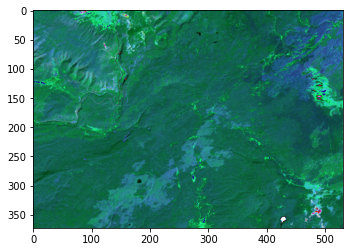

In [11]:
# Scale the data to [0, 255] to show as an RGB image. 
# Adapted from https://bit.ly/2XlmQY8. Credits to Justin Braaten
rgb_img_test = (255*((rgb_img[:, :, 0:3] - 100)/3500)).astype('uint8')
plt.imshow(rgb_img_test)
plt.show()

In [12]:
# Create an interactive map 

In [13]:
Map = geemap.Map(center=(40, -100), zoom=4)

In [14]:
# Add Earth Engine dataset
dem = ee.Image('USGS/SRTMGL1_003')
landcover = ee.Image("ESA/GLOBCOVER_L4_200901_200912_V2_3").select('landcover')
landsat7 = ee.Image('LE7_TOA_5YEAR/1999_2003')
states = ee.FeatureCollection("TIGER/2018/States")

# Set visualization parameters.
vis_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

# Add Earth Eninge layers to Map
Map.addLayer(dem, vis_params, 'STRM DEM', True, 0.5)
Map.addLayer(landcover, {}, 'Land cover')
Map.addLayer(landsat7, {'bands': ['B4', 'B3', 'B2'], 'min': 20, 'max': 200}, 'Landsat 7')
Map.addLayer(states, {}, "US States")

Map

Map(center=[40, -100], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=…

In [15]:
# Split panel map

In [16]:
# plotting

In [17]:
Map = geemap.Map()
landsat7 = ee.Image('LE7_TOA_5YEAR/1999_2003') \
    .select([0, 1, 2, 3, 4, 6])
landsat_vis = {
    'bands': ['B4', 'B3', 'B2'], 
    'gamma': 1.4
}
Map.addLayer(landsat7, landsat_vis, "LE7_TOA_5YEAR/1999_2003")

hyperion = ee.ImageCollection('EO1/HYPERION') \
    .filter(ee.Filter.date('2016-01-01', '2017-03-01'));
hyperion_vis = {
  'min': 1000.0,
  'max': 14000.0,
  'gamma': 2.5,
}
Map.addLayer(hyperion, hyperion_vis, 'EO1/HYPERION');

In [18]:
Map.set_plot_options(plot_type='bar', add_marker_cluster=True)

In [19]:
m = geemap.Map()
m

Map(center=[40, -100], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=…

In [20]:
m.plot_demo()

Element.toDictionary: Parameter 'element' is required.


In [21]:
# create_landsat_timelapse

In [22]:
Map = geemap.Map()
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=…

In [23]:
import os
out_dir = os.path.join(os.path.expanduser("~"), 'Downloads')
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

In [24]:
label = 'Urban Growth in Las Vegas'
Map.add_landsat_ts_gif(label=label, start_year=1985, bands=['Red', 'Green', 'Blue'], font_color='white', frames_per_second=10, progress_bar_color='blue')

Generating URL...
Please wait ...
The GIF image has been saved to: /home/manmeet/Downloads/landsat_ts_ydm.gif
Adding animated text to GIF ...
Adding GIF to the map ...
The timelapse has been added to the map.


In [25]:
import os
import ee
import geemap

In [26]:
Map = geemap.Map()
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=…

In [27]:
roi = ee.Geometry.Polygon(
    [[[-115.471773, 35.892718],
      [-115.471773, 36.409454],
        [-114.271283, 36.409454],
        [-114.271283, 35.892718],
        [-115.471773, 35.892718]]], None, False)

In [28]:
collection = geemap.landsat_timeseries(roi=roi, start_year=1985, end_year=2019, start_date='06-10', end_date='09-20')

In [30]:
print(collection.size().getInfo())

35


In [31]:
first_image = collection.first()

vis = {
    'bands': ['NIR', 'Red', 'Green'],
    'min': 0,
    'max': 4000,
    'gamma': [1, 1, 1]
}

Map.addLayer(first_image, vis, 'First image')


In [32]:
# Define arguments for animation function parameters.
video_args = {
  'dimensions': 768,
  'region': roi,
  'framesPerSecond': 10,
  'bands': ['NIR', 'Red', 'Green'],
  'min': 0,
  'max': 4000,
  'gamma': [1, 1, 1]
}

In [33]:
work_dir = os.path.join(os.path.expanduser("~"), 'Downloads')
if not os.path.exists(work_dir):
    os.makedirs(work_dir)
out_gif = os.path.join(work_dir, "landsat_ts.gif")

In [34]:
geemap.download_ee_video(collection, video_args, out_gif)

Generating URL...
Please wait ...
The GIF image has been saved to: /home/manmeet/Downloads/landsat_ts.gif


In [35]:
# Add animated text to GIF

In [36]:
geemap.show_image(out_gif)

Output()

In [37]:
texted_gif = os.path.join(work_dir, "landsat_ts_text.gif")
geemap.add_text_to_gif(out_gif, texted_gif, xy=('3%', '5%'), text_sequence=1985, font_size=30, font_color='#ffffff', add_progress_bar=False)

In [38]:
label = 'Urban Growth in Las Vegas'
geemap.add_text_to_gif(texted_gif, texted_gif, xy=('2%', '88%'), text_sequence=label, font_size=30, font_color='#ffffff', progress_bar_color='cyan')

In [39]:
geemap.show_image(texted_gif)

Output()

NAIP: National Agriculture Imagery Program
The National Agriculture Imagery Program (NAIP) acquires aerial imagery during the agricultural growing seasons in the continental U.S.

NAIP projects are contracted each year based upon available funding and the FSA imagery acquisition cycle. Beginning in 2003, NAIP was acquired on a 5-year cycle. 2008 was a transition year, and a three-year cycle began in 2009.

NAIP imagery is acquired at a one-meter ground sample distance (GSD) with a horizontal accuracy that matches within six meters of photo-identifiable ground control points, which are used during image inspection.

Older images were collected using 3 bands (Red, Green, and Blue: RGB), but newer imagery is usually collected with an additional near-infrared band (RGBN).

More information about NAIP imagery can be found on Earth Engine Data Catalog.

# Create annual composite of NAIP imagery
Select 4-band (RGBN) NAIP imagery.

In [40]:
Map = geemap.Map()

In [41]:
naip_ts = geemap.naip_timeseries(start_year=2009, end_year=2018)

In [42]:
# Create a list of layer names to be shown under the dropdown list.

In [43]:
layer_names = ['NAIP ' + str(year) for year in range(2009, 2019)]
print(layer_names)

['NAIP 2009', 'NAIP 2010', 'NAIP 2011', 'NAIP 2012', 'NAIP 2013', 'NAIP 2014', 'NAIP 2015', 'NAIP 2016', 'NAIP 2017', 'NAIP 2018']


In [44]:
# Set visualization parameters.

In [45]:
naip_vis = {'bands': ['N', 'R', 'G']}

In [46]:
# Create a split-panel map for visualizing NAIP imagery

In [47]:
Map = geemap.Map()
Map.ts_inspector(left_ts=naip_ts, right_ts=naip_ts, left_names=layer_names, right_names=layer_names, left_vis=naip_vis, right_vis=naip_vis)
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position'], widget=Dropdown(layout=Layout(max_width='…

In [48]:
import ee
import geemap

In [49]:
Map = geemap.Map()
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=…

In [50]:
region = Map.draw_last_feature

In [51]:

if region is not None:
    roi = region.geometry()
else: 
    roi = ee.Geometry.Polygon(
        [[[-115.897448, 35.640766], 
          [-115.897448, 36.603608], 
          [-113.784915, 36.603608], 
          [-113.784915, 35.640766], 
          [-115.897448, 35.640766]]], None, False)

In [52]:
print(roi.getInfo())

{'geodesic': False, 'type': 'Polygon', 'coordinates': [[[-115.897448, 35.640766], [-115.897448, 36.603608], [-113.784915, 36.603608], [-113.784915, 35.640766], [-115.897448, 35.640766]]]}


In [53]:
landsat_ts = geemap.landsat_timeseries(roi=roi, start_year=1984, end_year=2019, start_date='01-01', end_date='12-31')

In [54]:
layer_names = ['Landsat ' + str(year) for year in range(1984, 2020)]
print(layer_names)

['Landsat 1984', 'Landsat 1985', 'Landsat 1986', 'Landsat 1987', 'Landsat 1988', 'Landsat 1989', 'Landsat 1990', 'Landsat 1991', 'Landsat 1992', 'Landsat 1993', 'Landsat 1994', 'Landsat 1995', 'Landsat 1996', 'Landsat 1997', 'Landsat 1998', 'Landsat 1999', 'Landsat 2000', 'Landsat 2001', 'Landsat 2002', 'Landsat 2003', 'Landsat 2004', 'Landsat 2005', 'Landsat 2006', 'Landsat 2007', 'Landsat 2008', 'Landsat 2009', 'Landsat 2010', 'Landsat 2011', 'Landsat 2012', 'Landsat 2013', 'Landsat 2014', 'Landsat 2015', 'Landsat 2016', 'Landsat 2017', 'Landsat 2018', 'Landsat 2019']


In [55]:
landsat_vis = {
    'min': 0,
    'max': 4000,
    'gamma': [1, 1, 1],
    'bands': ['NIR', 'Red', 'Green']}

In [56]:
Map = geemap.Map()
Map.ts_inspector(left_ts=landsat_ts, right_ts=landsat_ts, left_names=layer_names, right_names=layer_names, left_vis=landsat_vis, right_vis=landsat_vis)
Map.centerObject(roi, zoom=8)
Map

Map(center=[36.12274913882652, -114.84118150000003], controls=(WidgetControl(options=['position'], widget=Drop…

In [57]:
import ee
import geemap

In [58]:
Map = geemap.Map()
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=…

In [59]:
NLCD = ee.ImageCollection('USGS/NLCD')

In [60]:
NLCD_layers = NLCD.aggregate_array('system:id').getInfo()
print(NLCD_layers)

['USGS/NLCD/NLCD1992', 'USGS/NLCD/NLCD2001', 'USGS/NLCD/NLCD2001_AK', 'USGS/NLCD/NLCD2001_HI', 'USGS/NLCD/NLCD2001_PR', 'USGS/NLCD/NLCD2004', 'USGS/NLCD/NLCD2006', 'USGS/NLCD/NLCD2008', 'USGS/NLCD/NLCD2011', 'USGS/NLCD/NLCD2011_AK', 'USGS/NLCD/NLCD2011_HI', 'USGS/NLCD/NLCD2011_PR', 'USGS/NLCD/NLCD2013', 'USGS/NLCD/NLCD2016']


In [61]:
NLCD2001 = ee.Image('USGS/NLCD/NLCD2001').select('landcover')
NLCD2006 = ee.Image('USGS/NLCD/NLCD2006').select('landcover')
NLCD2011 = ee.Image('USGS/NLCD/NLCD2011').select('landcover')
NLCD2016 = ee.Image('USGS/NLCD/NLCD2016').select('landcover')

In [62]:
NLCD = ee.ImageCollection([NLCD2001, NLCD2006, NLCD2011, NLCD2016])

In [63]:
NLCD_layer_names = ['NLCD ' + str(year) for year in range(2001, 2017, 5)]
print(NLCD_layer_names)

['NLCD 2001', 'NLCD 2006', 'NLCD 2011', 'NLCD 2016']


In [64]:
roi = ee.Geometry.Polygon(
    [[[-115.897448, 35.640766], 
      [-115.897448, 36.603608], 
      [-113.784915, 36.603608], 
      [-113.784915, 35.640766], 
      [-115.897448, 35.640766]]], None, False)

In [65]:
landsat_ts = geemap.landsat_timeseries(roi=roi, start_year=2001, end_year=2016, start_date='01-01', end_date='12-31')

In [66]:
landsat_layer_names = ['Landsat ' + str(year) for year in range(2001, 2017)]

In [67]:
landsat_vis = {
    'min': 0,
    'max': 4000,
    'gamma': [1, 1, 1],
    'bands': ['NIR', 'Red', 'Green']}

nlcd_vis = {
    'bands': ['landcover']
}

In [68]:
Map = geemap.Map()
Map.ts_inspector(left_ts=landsat_ts, right_ts=NLCD, left_names=landsat_layer_names, right_names=NLCD_layer_names, left_vis=landsat_vis, right_vis=nlcd_vis)
Map.centerObject(roi, zoom=8)
Map

Map(center=[36.12274913882652, -114.84118150000003], controls=(WidgetControl(options=['position'], widget=Drop…

In [70]:
import ee
import geemap

In [71]:
Map = geemap.Map(toolbar_ctrl=True)
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=…

In [72]:
# Add Earth Engine dataset
dem = ee.Image('USGS/SRTMGL1_003')
landcover = ee.Image("ESA/GLOBCOVER_L4_200901_200912_V2_3").select('landcover')
landsat7 = ee.Image('LE7_TOA_5YEAR/1999_2003')
states = ee.FeatureCollection("TIGER/2018/States")

# Set visualization parameters.
vis_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

# Add Earth Eninge layers to Map
Map.addLayer(dem, vis_params, 'STRM DEM', True, 0.5)
Map.addLayer(landcover, {}, 'Land cover')
Map.addLayer(landsat7, {'bands': ['B4', 'B3', 'B2'], 'min': 20, 'max': 200}, 'Landsat 7')
Map.addLayer(states, {}, "US States")

In [73]:
import os

In [74]:
download_dir = os.path.join(os.path.expanduser('~'), 'Downloads')
if not os.path.exists(download_dir):
    os.makedirs(download_dir)
html_file = os.path.join(download_dir, 'my_map.html')

In [75]:
Map.to_html(outfile=html_file, title='My Map', width='100%', height='880px')

In [77]:
png_file = os.path.join(download_dir, 'my_map.png')

In [78]:
Map.to_image(outfile=png_file, monitor=1)

In [79]:
jpg_file = os.path.join(download_dir, 'my_map.jpg')

In [80]:
Map.to_image(outfile=jpg_file, monitor=1)

In [81]:
import ee 
import geemap.eefolium as geemap

In [82]:
# Create a map centered at (lat, lon).
Map = geemap.Map(center=[40, -100], zoom=4)

# Use an elevation dataset and terrain functions to create
# a custom visualization of topography.

# Load a global elevation image.
elev = ee.Image('USGS/GMTED2010')

# Zoom to an area of interest.
Map.setCenter(-121.069, 50.709, 6)

# Add the elevation to the map.
Map.addLayer(elev, {}, 'elev')

# Use the terrain algorithms to compute a hillshade with 8-bit values.
shade = ee.Terrain.hillshade(elev)
Map.addLayer(shade, {}, 'hillshade', False)

# Create a "sea" variable to be used for cartographic purposes
sea = elev.lte(0)
Map.addLayer(sea.mask(sea), {'palette':'000022'}, 'sea', False)

# Create a custom elevation palette from hex strings.
elevationPalette = ['006600', '002200', 'fff700', 'ab7634', 'c4d0ff', 'ffffff']
# Use these visualization parameters, customized by location.
visParams = {'min': 1, 'max': 3000, 'palette': elevationPalette}

# Create a mosaic of the sea and the elevation data
visualized = ee.ImageCollection([
  # Mask the elevation to get only land
  elev.mask(sea.Not()).visualize(**visParams),
  # Use the sea mask directly to display sea.
  sea.mask(sea).visualize(**{'palette':'000022'})
]).mosaic()

# Note that the visualization image doesn't require visualization parameters.
Map.addLayer(visualized, {}, 'elev palette', False)

# Convert the visualized elevation to HSV, first converting to [0, 1] data.
hsv = visualized.divide(255).rgbToHsv()
# Select only the hue and saturation bands.
hs = hsv.select(0, 1)
# Convert the hillshade to [0, 1] data, as expected by the HSV algorithm.
v = shade.divide(255)
# Create a visualization image by converting back to RGB from HSV.
# Note the cast to byte in order to export the image correctly.
rgb = hs.addBands(v).hsvToRgb().multiply(255).byte()
Map.addLayer(rgb, {}, 'styled')

states = ee.FeatureCollection('TIGER/2018/States')
Map.addLayer(ee.Image().paint(states, 0, 2), {}, "US States")

In [83]:
# Add layer control to the map.
Map.setControlVisibility()
# Display the map.
Map

In [84]:
Map.publish(name='gee_folium_map', headline='Terrain Visualization', visibility='PUBLIC', overwrite=True)

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/manmeet3591/reports/gee-folium-map/


Netcdf

In [92]:
import geemap
import os
import xarray as xr
from ipyleaflet import Map, TileLayer, basemaps
from ipyleaflet.velocity import Velocity

In [93]:
Map = geemap.Map(center=[44.33, -130.60], zoom=3, interpolation='nearest')
Map.add_layer(basemaps.CartoDB.DarkMatter)
Map

Map(center=[44.33, -130.6], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(v…

In [97]:
file_path = os.path.abspath('/home/manmeet/Documents/gee_lockdown/wind-global.nc')
if not os.path.exists(file_path):
    url = 'https://github.com/giswqs/geemap/raw/master/examples/data/wind-global.nc'
    import requests
    r = requests.get(url)
    wind_data = r.content
    with open(file_path, 'wb') as f:
        f.write(wind_data)

In [99]:
ds = xr.open_dataset(file_path)
ds

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360)
Coordinates:
  * lat      (lat) float64 90.0 89.0 88.0 87.0 86.0 ... -87.0 -88.0 -89.0 -90.0
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    u_wind   (lat, lon) float64 ...
    v_wind   (lat, lon) float64 ...
Attributes:
    centerName:      US National Weather Service - NCEP(WMC)
    disciplineName:  Meteorological products
    refTime:         2016-04-30T06:00:00.000Z

In [101]:
display_options = {
    'velocityType': 'Global Wind',
    'displayPosition': 'bottomleft',
    'displayEmptyString': 'No wind data'
}
wind = Velocity(
    data=ds, 
    name = 'Velocity',
    zonal_speed='u_wind', meridional_speed='v_wind', 
    latitude_dimension='lat', longitude_dimension='lon', 
    velocity_scale=0.01, max_velocity=20, 
    display_options=display_options
)
Map.add_layer(wind)
Map

Map(bottom=1017.0, center=[44.33, -130.6], controls=(WidgetControl(options=['position'], widget=HBox(children=…


Oil palm concessions in southern Myanmar consist mostly of unconverted forest
Credits to Keiko Nomura

GEE App: https://nkeikon.users.earthengine.app/view/tanintharyi-oil-palm-and-rubber-map

Source code: https://github.com/nkeikon/tanintharyi

Reference: https://go.nature.com/2QBIrYe

Demo: https://i.imgur.com/VrYKmVG.gifv

In [102]:
# Installs geemap package
import subprocess

try:
    import geemap
except ImportError:
    print('geemap package not installed. Installing ...')
    subprocess.check_call(["python", '-m', 'pip', 'install', 'geemap'])
    import geemap


# Authenticates and initializes Earth Engine
import ee

try:
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize()


In [103]:
Map = geemap.Map(center=[40,-100], zoom=4)
Map.add_basemap('ROADMAP') # Add Google Map
Map

layer already on map: TileLayer(attribution='Google', name='Google Maps', options=['attribution', 'detect_retina', 'max_native_zoom', 'max_zoom', 'min_native_zoom', 'min_zoom', 'no_wrap', 'tile_size', 'tms'], url='https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}')
Basemap can only be one of the following:
  ROADMAP
  SATELLITE
  TERRAIN
  HYBRID
  ESRI
  Esri Ocean
  Esri Satellite
  Esri Standard
  Esri Terrain
  Esri Transportation
  Esri Topo World
  Esri National Geographic
  Esri Shaded Relief
  Esri Physical Map
  FWS NWI Wetlands
  FWS NWI Wetlands Raster
  Google Maps
  Google Satellite
  Google Terrain
  Google Satellite Hybrid
  NLCD 2016 CONUS Land Cover
  NLCD 2013 CONUS Land Cover
  NLCD 2011 CONUS Land Cover
  NLCD 2008 CONUS Land Cover
  NLCD 2006 CONUS Land Cover
  NLCD 2004 CONUS Land Cover
  NLCD 2001 CONUS Land Cover
  USGS NAIP Imagery
  USGS Hydrography
  USGS 3DEP Elevation
  OpenStreetMap.Mapnik
  OpenStreetMap.BlackAndWhite
  OpenStreetMap.DE
  OpenStreetMap.F

Map(center=[40, -100], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=…

Add Earth Engine Python script

In [104]:

# Add Earth Engine data
area1 = ee.Image("users/nkeikon/myanmar_sr/area1_map")
area2 = ee.Image("users/nkeikon/myanmar_sr/area2_map")
tanintharyi = ee.FeatureCollection("users/nkeikon/myanmar_sr/TNI")
Map.centerObject(tanintharyi,10)
total = ee.ImageCollection([area1,area2]).mosaic()
palette =['ff0000',# palm  (red)
              '9933ff',#rubber  (purple)
              '008000',#other trees  (green)
              'lime',#shrub (lime)
              'yellow',#bare (yellow)
              '0000ff',#river (blue)
]
viz = {'min':1, 'max':6, 'palette':palette}
MAIN = 'Default map'
OILPALM = 'Oil palm only'
RUBBER = 'Rubber only'
OILPALM_RUBBER = 'Oil palm and rubber'
mainVis = total.visualize(**viz)
oilpalmVis = total.eq(1).selfMask().visualize(**{'palette':'red'})
rubberVis = total.eq(2).selfMask().visualize(**{'palette':'purple'})
oilpalm_rubberVis = oilpalmVis.blend(rubberVis)
Map.addLayer(mainVis, {}, 'Land cover')
Map.addLayer(oilpalmVis, {}, 'Oil palm only')
Map.addLayer(rubberVis, {}, 'Rubber only')
Map.addLayer(oilpalm_rubberVis, {}, 'Oil palm and rubber')

In [105]:
# Add widgets to the map
import ipywidgets as widgets
from ipyleaflet import WidgetControl
legend = widgets.HTML(
    value='<img src="https://i.imgur.com/Ye2sgan.png">',
    placeholder='Land cover',
    descripition='Land cover'
)

citation = widgets.HTML(
    value='Reference: <a href="https://go.nature.com/2QBIrYe">https://go.nature.com/2QBIrYe</a>',
    placeholder='Land cover',
    descripition='Land cover'
)

dropdown = widgets.Dropdown(
    options=[('Land cover', 1), ('Old palm only', 2), ('Rubber only', 3), ('Oil palm and bubber only', 4), ('Show all layers', 5)],
    value=5,
    description='Select layer',
)

legend_control = WidgetControl(widget=legend, position='bottomleft')
citation_control = WidgetControl(widget=citation, position='bottomright')
dropdown_control = WidgetControl(widget=dropdown, position='topright')

all_layers = Map.layers

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        if change['new'] == 5: 
            Map.layers = all_layers
        else:
            Map.layers = Map.layers[:3] 
            layer_index = change['new'] + 2
            Map.add_layer(all_layers[layer_index])

dropdown.observe(on_change)

Map.add_control(legend_control)
Map.add_control(citation_control)
Map.add_control(dropdown_control)

In [107]:
Map

Map(bottom=122056.0, center=[12.655743865888127, 98.74687371251025], controls=(WidgetControl(options=['positio…

# US Census data